## 타이타닉 생존자 예측

### 데이터를 읽고, 전체적인 상황 이해하기

In [ ]:
# https://financedata.github.io/posts/display-all-values-in-cell-jupyter-notebook.html
# Q: Jupyter Notebook 셀에서 마지막 값 하나만이 아니라 중간에 모든 값을 차례로 출력하고 싶습니다.
# A: print(), IPython.display를 써서 매번 출력하거나 InteractiveShell의 옵션을 지정합니다.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# 데이터 읽어오기
# raw_data = pd.read_csv('./train.csv') - 리눅스 용 (터미널에서 실행)
raw_data = pd.read_csv(r'C:\Users\jun\dataScience\DataScience\data\train.csv')

In [4]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
raw_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# 데이터의 결측치 존재여부, 데이터의 타입, 컬럼의 수
# 데이터프레임의 메모리 사용량
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# 데이터프레임의 통계정보를 알려준다
# 평균치 등등 
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
plt.subplot

<function matplotlib.pyplot.subplot(*args, **kwargs)>

In [9]:
temp = raw_data['Survived']
temp1 = temp.value_counts()
temp1

0    549
1    342
Name: Survived, dtype: int64

C:\Users\jun\miniconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


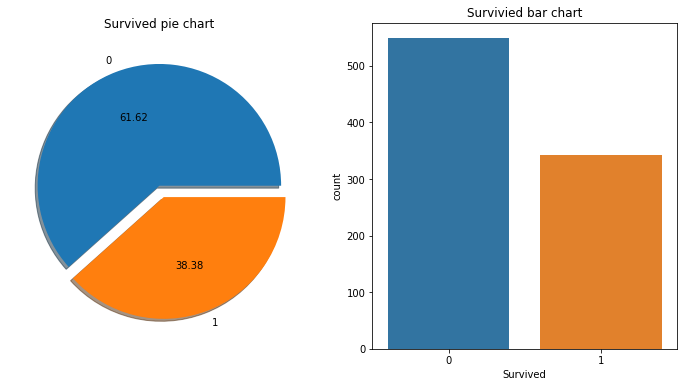

In [10]:
# 그래프를 2개 : 왼쪽 = 원형차트, 오른족 = 바 차트. 
f, ax = plt.subplots(1,2, figsize = (12,6)) # 1 row 2 column figsize = 6,6 = 정사각형 사이즈. 

#ax[0]: 왼쪽 차트 이름
# row_data 중 'survived' 데이터만
# explode 의 0.1 은 파이차트 파랑 노랑 사이 간격
# autocpct = 소숫점 1 하고 소숫점 2째 자리 까지 표현해라 

# 0과 1의 갯수를 세고, 원형 그래프( 거리는 0.1 띄우고, 소숫점 2째 자리까지 표현), 어디다가? ax[0] 에 집어넣을 것임
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
raw_data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f', ax=ax[0], shadow = True) 
ax[0].set_title ('Survived pie chart')
ax[0].set_ylabel('')

# raw data 전체 중에 특정한 컬럼 이름 Survivied 만 센다. 
sns.countplot('Survived', data=raw_data, ax=ax[1])
# sns.countplot('Pclass', data=raw_data, ax=ax[1])
ax[1].set_title('Survivied bar chart')
plt.show()

<AxesSubplot:>

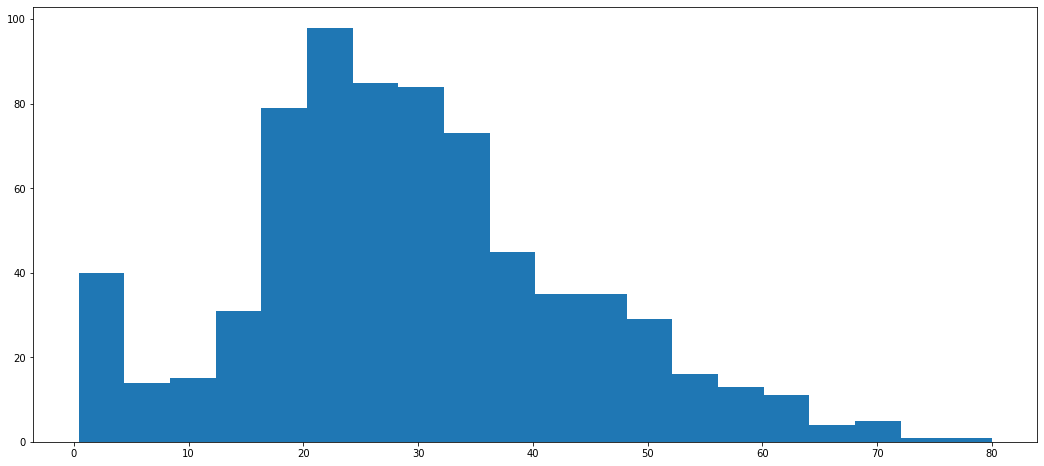

In [11]:
# 승객의 나이에 대한 분포도 히스토그램 
# bins = 전체를 몇개로 나눌꺼냐 (히스도그램의 바 갯수). 
# 최소~ 최대 값을 20 개의 구간으로. (10개보단 좀더 세밀하게 나눔. 40은 2살부터). 더 세밀하게 할 수록 없는 데이터도 나옴. 
raw_data['Age'].hist(bins=20, figsize=(18,8), grid=False)

In [12]:
# Pclass를 기준으로 모든 열 데이터의 평균 값 구하기
raw_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [13]:
# 상관계수 구하기 (보통 벡터로 구함) - cos 상관계수 따지면 같은 벡터면 1
raw_data.corr()
# - 값 :  반대관계. 
# 수치가 높으면 상관관계가 높음. 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


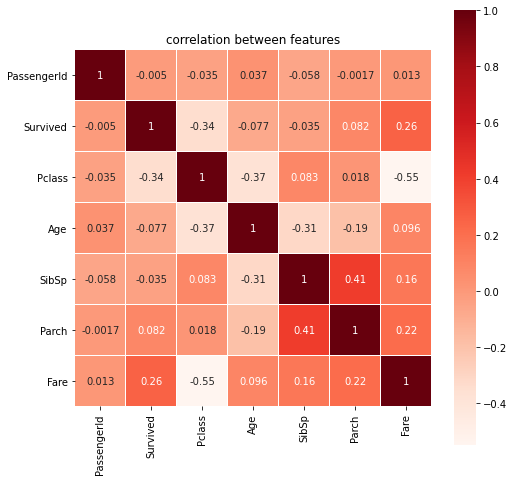

In [14]:
# 상관계수를 도표식 (그래프식)으로 표현하고 싶을 때
# colormaps = https://matplotlib.org/stable/tutorials/colors/colormaps.html
# linecolor = 칸과 칸 사이에 선 색깔. (구별선)

# 붉은 색이 진할 수록 상관관계가 높구나. 1은 자기 자신이니까 그것만 배제하고. 
plt.figure(figsize=(8,8))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, 
           annot=True, cmap=plt.cm.Reds, linecolor='white')
plt.title('correlation between features')
plt.show()

## 나이별 구분 및 성별 생존율 확인하기

In [15]:
# age_cat 라는 열을 추가로 생성
# cut 을 하는데 특정 나이대 별로 (비 균등 눈금)
raw_data['age_cat'] = pd.cut(raw_data['Age'], bins = [0,3,7,15,30,60,100], # 구간을 나눔. 0세 3세 .. 100세 이렇게 보고싶은 구간 설정.
                            include_lowest=True,
                            labels=['baby','children','teenage','young','adult','old']) # 나이별 구간을 0-3세 이렇게 각 구간을 이름 줌
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [16]:
# age_cat 기준으로 mean 값을 내서 평균치를 볼 수 있다
# 각 나이대 별로 평균값 구할 때 
raw_data.groupby('age_cat').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
age_cat,,,,,,,
baby,396.700000,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
children,466.700000,0.700000,2.650000,4.950000,1.750000,1.350000,27.905830
teenage,442.060606,0.454545,2.696970,11.500000,1.727273,1.121212,35.217430
young,435.058282,0.358896,2.426380,23.262270,0.355828,0.263804,28.015413
adult,470.388693,0.420495,1.954064,41.132509,0.363958,0.392226,42.429225
old,432.545455,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


C:\Users\jun\miniconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\jun\miniconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\jun\miniconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


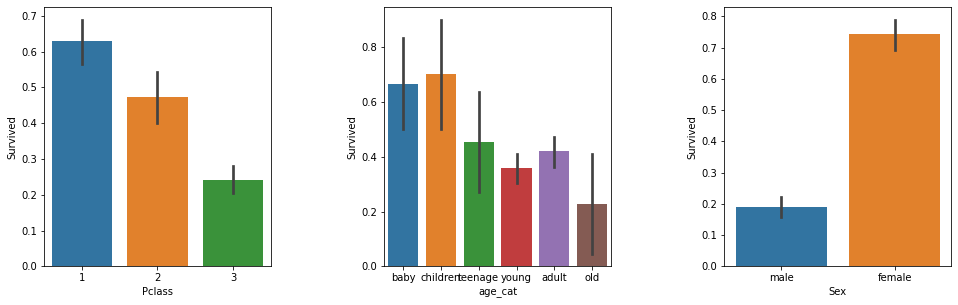

In [17]:
# 막대 그래프 안에 검은 막대는 편차가 얼마나 심한지 보여줌. 막대가 길수록 편차가 심하다. children 내에서도 편차가 심하다 
# Pclass 1이고 children 이고 여성이면 가장 생존율이 높음. 그래프의 결과. 
# 바 차트를 이용해서 클래스별로 . 두개의 상관관계에 대한 부분들을 도표로 볼 수 있다. 
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot('Pclass', 'Survived', data=raw_data)
plt.subplot(132)
sns.barplot('age_cat', 'Survived', data=raw_data)
plt.subplot(133)
sns.barplot('Sex', 'Survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

C:\Users\jun\miniconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\jun\miniconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


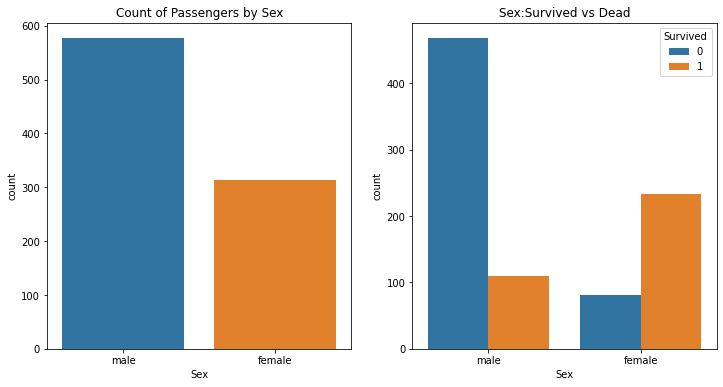

In [18]:
# 가로가 성별, 세로축이 승객숫자. 타이타닉에 탑승했던건 남자가 더 많고 
# 전체 데이터를 입력해서 얼마나 살았나 볼라고 countplot 한것임
# countplot . 생존하고 죽은 사람들 비율 볼라고, 전체 성별 비율 볼라고. 

f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('Sex',data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('Sex',hue='Survived',data=raw_data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [19]:
# 보트 탑승 승객의 생존율
# raw_data['boat'] --> No data

## 의심: 1등실에 있던 사람들 생존율이 가장 높았기에,
## 귀족들의 생존율만 조사

In [20]:
# 이름의 앞의 부분과 뒷 부분 나누기 전에 이름들 속성 보기
raw_data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [21]:
# 귀족들만의 특별 명칭들이 있었으니까 그것을 조사해야 함. 
raw_data['Name'][0] # Mr, Mrs, Miss 

'Braund, Mr. Owen Harris'

In [22]:
raw_data['Name'][0].split(',')[1] # 콤마 기준으로 split 하고 뒷부분 가져올라고 [1]

' Mr. Owen Harris'

In [23]:
raw_data['Name'][0].split(',')[1].split('.')[0] # 점을 기준으로 앞에꺼 만 따오려고 [0]

' Mr'

In [24]:
raw_data['Name'][0].split(',')[1].split('.')[0].strip() # 공백을 없애줌. 

'Mr'

In [25]:
# 이름에서 그 사람의 신분을 확인하는 문자열을 추출 -> lambda 함수로 만듬
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()

# Name 열을 입력해서 신분만 추출 -> Title 이라는 열 생성
raw_data['Title'] = raw_data['Name'].map(conversion_rare)

In [26]:
# 'Title' 열 중에 고유한 이름만 확인 
raw_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [27]:
pd.crosstab(raw_data['Title'], raw_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [28]:
raw_data['title'] = raw_data['Title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['Title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['Title'].replace('Mme', 'Mrs')

In [29]:
raw_data['Title'].unique()

# 원래 결과 - 내가 밑에꺼 다 돌리고 다시 돌려서 결과가 다르게 나온거임. 
# array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady',
 #      'Sir', 'Col', 'Capt', 'the Countess', 'Jonkheer'], dtype=object)

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [30]:
raw_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() # 선생은 0-13까지 나옴. 

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [31]:
# 귀족의 신분을 리스트로 생성
Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    raw_data['Title'] = raw_data['Title'].replace(each, 'Rare')

In [32]:
raw_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() # 선생은 0-3개까지 나옴. 

,Title,Survived
0,Miss,0.697802
1,Mlle,1.000000
2,Mme,1.000000
3,Mr,0.156673
4,Mrs,0.792000
5,Ms,1.000000
6,Rare,0.492063


### 생존율 예측을 위해 데이터를 학습, 학습에 사용할 특징 데이터를 선택

In [33]:
# 다시 복습 요망

# 성별을 'female', 'male' -> '0','1' 
# 학습을 위해서는 문자열 보다는 숫자가 낫다.

# ex2 dataScience 에 Label Encoding 으로도 할 수 있음. 

tmp = []
for each in raw_data['Sex']:
    if each=='female':
        tmp.append(0)
    elif each=='male':
        tmp.append(1)
    else:
        #예외처리 코드
        tmp.append(np.nan)

In [34]:
raw_data['Sex']=tmp
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat,Title,title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,young,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,adult,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,adult,Mr,Mr


In [35]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  age_cat      714 non-null    category
 13  Title        891 non-null    object  
 14  title        891 non-null    object  
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 98.7+ KB


In [36]:
# dtype int -> float
raw_data['Survived'] = raw_data['Survived'].astype('float')
raw_data['Pclass'] = raw_data['Pclass'].astype('float')
raw_data['Sex'] = raw_data['Sex'].astype('float')
raw_data['SibSp'] = raw_data['SibSp'].astype('float')
raw_data['Parch'] = raw_data['Parch'].astype('float')
raw_data['Fare'] = raw_data['Fare'].astype('float')
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat,Title,title
0,1,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,young,Mr,Mr
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,C,adult,Mrs,Mrs
2,3,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,young,Miss,Miss
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,S,adult,Mrs,Mrs
4,5,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,NaN,S,adult,Mr,Mr


In [37]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    float64 
 2   Pclass       891 non-null    float64 
 3   Name         891 non-null    object  
 4   Sex          891 non-null    float64 
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    float64 
 7   Parch        891 non-null    float64 
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  age_cat      714 non-null    category
 13  Title        891 non-null    object  
 14  title        891 non-null    object  
dtypes: category(1), float64(7), int64(1), object(6)
memory usage: 98.7+ KB


###  생존자 예측 모델 수립

In [38]:
# 상관관계 높은 6개를 별도의 데이터 프레임을 가져오고
train_pre = raw_data[['Pclass', 'Sex','Age','SibSp','Parch','Fare']]
train_pre.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500


In [39]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Sex     891 non-null    float64
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    float64
 4   Parch   891 non-null    float64
 5   Fare    891 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [40]:
# 결측치 채웠고
meanAge = train_pre['Age'].mean()
print(meanAge)
train_pre['Age'] = train_pre['Age'].fillna(meanAge)

29.69911764705882


C:\Users\jun\miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_pre, raw_data[['Survived']], test_size=0.1, random_state=123, stratify=raw_data['Survived'])

In [43]:
y_train

,Survived
608,1.0
862,1.0
778,0.0
838,1.0
20,0.0
...,...
506,1.0
387,1.0
245,0.0
768,0.0


In [44]:
sns.countplot(y_train) # 부동소숫점으로 바꿔놔서 그래프로 그릴려고 하면 dtype 바꿔야 함 float -> int 로 

C:\Users\jun\miniconda3\envs\ds\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [47]:
temp = y_train.astype('int')
temp

,Survived
608,1
862,1
778,0
838,1
20,0
...,...
506,1
387,1
245,0
768,0


In [ ]:
# sns.countplot(temp)

In [48]:
x_train.shape, x_test.shape

((801, 6), (90, 6))

In [49]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
677,3.0,0.0,18.000000,0.0,0.0,9.8417
547,2.0,1.0,29.699118,0.0,0.0,13.8625
317,2.0,1.0,54.000000,0.0,0.0,14.0000
261,3.0,1.0,3.000000,4.0,2.0,31.3875
273,1.0,1.0,37.000000,0.0,1.0,29.7000
...,...,...,...,...,...,...
98,2.0,0.0,34.000000,0.0,1.0,23.0000
322,2.0,0.0,30.000000,0.0,0.0,12.3500
382,3.0,1.0,32.000000,0.0,0.0,7.9250
365,3.0,1.0,30.000000,0.0,0.0,7.2500


In [50]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [51]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,0.0,18.000000,0.0,0.0,9.8417
1,2.0,1.0,29.699118,0.0,0.0,13.8625
2,2.0,1.0,54.000000,0.0,0.0,14.0000
3,3.0,1.0,3.000000,4.0,2.0,31.3875
4,1.0,1.0,37.000000,0.0,1.0,29.7000
...,...,...,...,...,...,...
796,2.0,0.0,34.000000,0.0,1.0,23.0000
797,2.0,0.0,30.000000,0.0,0.0,12.3500
798,3.0,1.0,32.000000,0.0,0.0,7.9250
799,3.0,1.0,30.000000,0.0,0.0,7.2500


In [52]:
x_test.info() # Age 에 Null 값이 없겠금.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  90 non-null     float64
 1   Sex     90 non-null     float64
 2   Age     90 non-null     float64
 3   SibSp   90 non-null     float64
 4   Parch   90 non-null     float64
 5   Fare    90 non-null     float64
dtypes: float64(6)
memory usage: 4.3 KB


In [53]:
x_train.info() # 이것도 null 값 없겠끔. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  801 non-null    float64
 1   Sex     801 non-null    float64
 2   Age     801 non-null    float64
 3   SibSp   801 non-null    float64
 4   Parch   801 non-null    float64
 5   Fare    801 non-null    float64
dtypes: float64(6)
memory usage: 37.7 KB


In [ ]:
### 위에꺼 복습 요망 ###

In [ ]:
## 머신러닝 ##

In [54]:
# 생존의 문제는 Classification
# DecisionTree

from sklearn.tree import DecisionTreeClassifier

# 1. Define Model
model = DecisionTreeClassifier(max_depth=3, random_state = 123)

In [55]:
# 2. Train
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [61]:
# ground truth value = 정답
# Accuracy, Recall, Precision, F1 : 성능(정확도) 평가기준
from sklearn.metrics import accuracy_score

# 3. Prediction
prediction = model.predict(x_test)
print(prediction)
print(len(prediction))
print(len(y_test))
# 어제는 
#(prediction == y_test).mean()

print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100)) # y_test 랑 prediction 비교해서 알려줌. 

[1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
90
90
Accuracy : 84.44444444444444%


TP + FP + FN + TN = 1 이 되어야 함
전체 다 더한 것을 total 이라고 한다면, 

Accuracy_score = ( TP + TN ) / total <br>
Precision = predicted value 가 True 가 된것중에 정답인게 된거랑 아닌거 구별 <br>
Recall = Ground Truth value 가 True 가 된 것중에 정답인인게 된거랑 아닌거랑 구별 <br>

Precision = TP / (TP + FP) <br>
Recall = TP / (TP + FN) <br>
F1 = Precision 과 Recall 의 조화평균 <br>

---
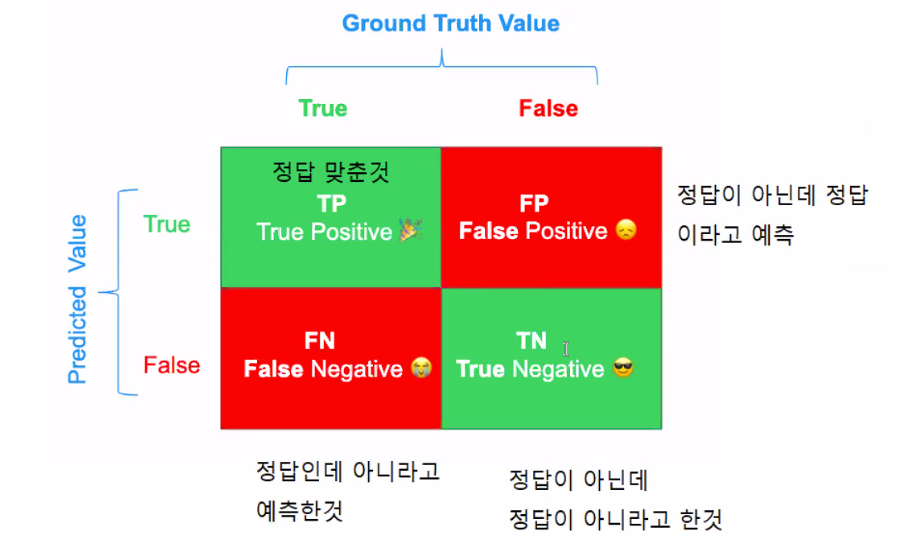

-------

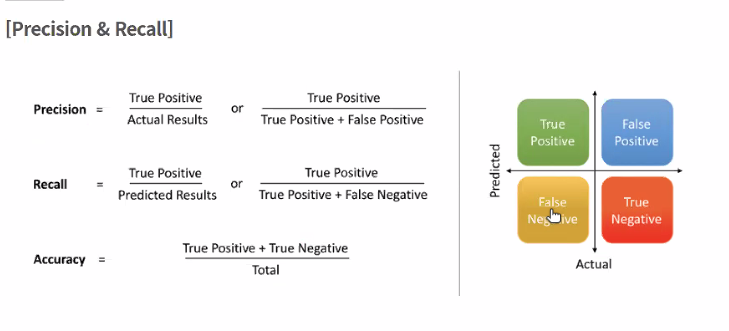

-----

Precision 과 Recall 관계는 반대관계
ex) 암환자 100명 실제 암환자 1명 99명 정상인

다 암환자로 얘기할 거냐 모든 사람이 암환자가 아니라고 얘기할거냐의 기준에 따라 다름. 

암환자인데 암환자가 아닌것
암환자아닌데 암환자라고 한 것

암환자인데 실제로, 암환자가 아니라고 기준 두고 얘기 하는게 Recall

그래프의 중간점이 F1 score 


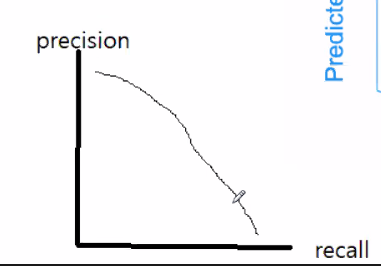

In [64]:
# 생존자 예측
# Pclass, Sex, Age, SibSp, Parch, Fare
dicaprio = [3.,1.,19.,0.,0.,5.]
winslet = [1.,0.,17.,1.,1.,100.]


In [65]:
model.predict_proba([dicaprio]) # 생존확률, 죽을 확률

array([[0.87692308, 0.12307692]])

## Logisitic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# 1. Define Model
model = LogisticRegression()

In [50]:
model.fit(x_train, y_train)

C:\Users\jun\miniconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\jun\miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [51]:
prediction = model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score

print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 81.11111111111111%


## SGD Classifier

In [53]:
from sklearn.linear_model import SGDClassifier

In [58]:
model = SGDClassifier(penalty='l1', random_state=123, n_jobs = -1)

In [59]:
model.fit(x_train, y_train)

C:\Users\jun\miniconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(n_jobs=-1, penalty='l1', random_state=123)

In [60]:
prediction = model.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score

print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 75.55555555555556%


## KNN (K-Neighbors Classifier)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
model = KNeighborsClassifier()

In [64]:
# 2. Train Model
model.fit(x_train, y_train)

C:\Users\jun\miniconda3\envs\ds\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [65]:
prediction = model.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score

print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 68.88888888888889%


## Random Forest - kaggle 에서 가장 선호하는 방법

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
# http://blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220979751089&parentCategoryNo=49&categoryNo=87&viewDate=&isShowPopularPosts=false&from=postView
model = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, n_jobs=2, random_state=120)

In [88]:
model.fit(x_train, y_train)

C:\Users\jun\miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=120)

In [89]:
prediction = model.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score

print("Accuracy : {}%".format(accuracy_score(y_test, prediction)*100))

Accuracy : 81.11111111111111%
